---
# <font color='DarkOliveGreen'>**Microsoft Malware Prediction Project** </font>
---

### <font color='DarkOliveGreen'> **Project Objective** </font>
#### The objective of this project is to utelize various attribures of a Windows computer to determine the probability of the machine being infected by malware. 

### <font color='DarkOliveGreen'> **Data Overview** </font>
#### The data used for this project derives from Kaggle's *Microsoft Malware Prediction* contest. Overall, the data is 7.89 gigabytes in size and contains 167 colunms. For the purposes of this project, only a proprotion of the whole dataset will be used for the training and testing datasets. Specifically, 1,000,000 rows are used for the training and test datasets. The data on Kaggle can be found at: https://www.kaggle.com/c/microsoft-malware-prediction/data?select=test.csv 

### <font color='DarkOliveGreen'> **Project Flow** </font>
#### For this project, a random forest model will be used to meet the project objective. The flow of this project follows a standard structure of analysis as follows: 

- <font color='Gray'>**Mounting the drive:** Because this team project is done using Colab, it is important to mount the drive such that all team members have access.
- **Loading the Data:** The data is loaded from Kaggle
- **Data Exploration:** The data exploration process features visuals, counts, and observations that guide the project in its data cleansing and preparation process.
- **Data Cleansing:** The data cleansing step primarilly demonstrates varible reduction, resolving null values, and feature engineering
- **Modelling:** A random forest model is built
</font>
---

# <font color='DarkOliveGreen'>**Mounting the drive and Download Kaggle Dataset** </font>
---
##### (Do not run the code under this section)

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json
# api_token = {"username":"samalqarzi","key":"13324f69d8ccb965cb7ca372315ea0b3"}
# import json
# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# import kaggle
# from kaggle.api.kaggle_api_extended import KaggleApi
# api = KaggleApi()
# api.authenticate()
# api.competition_download_files('microsoft-malware-prediction', 
#                                path='/content/drive/MyDrive/Security_SP21_Project/')

In [ ]:
# %cd drive/MyDrive/Security_SP21_Project/

/content/drive/MyDrive/Security_SP21_Project


In [ ]:
# from zipfile import ZipFile
# zf = ZipFile('microsoft-malware-prediction.zip')
# zf.extractall('/content/drive/MyDrive/Security_SP21_Project/') #save files in selected folder
# zf.close()

# <font color='DarkOliveGreen'>**Loading the Data**</font>
---
##### Below is the process used for uploading the data. Note that the preliminary libraries are also imported below

In [ ]:
# import libraries
import random
import numpy as np
from datetime import datetime

import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_rows', 100)
rows = 1000000
RANDOM_STATE = 42
TARGET = "HasDetections"


In [ ]:
# installing and importing libs like Pydrive, to be able to read the file directly from the drive
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# authentication for the drive users to be able to read the data file
# when you run this code, it will ask you to authenticate, it will render a link below, click it!
# sign in with your email, that is used in the drive
# after signing in, it will give you an authentication code, put it in the required area below and press enter
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Getting the train set from drive
fileDownloaded = drive.CreateFile({'id':'1-1bA2iEptqwTgZNOH17iE8NZRgBADne7'})
fileDownloaded.GetContentFile('train.csv')

In [ ]:
# Getting the test set from drive
fileDownloaded = drive.CreateFile({'id':'1-0WtW5kLCHgWOF2Q-fgQalbylkApvjXU'})
fileDownloaded.GetContentFile('test.csv')

In [ ]:
#  a dictionary of columns and their datatypes
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [ ]:
# read train data
df_train = pd.read_csv('train.csv', nrows = rows, low_memory = False, dtype = dtypes)

In [ ]:
# reading test data
df_test = pd.read_csv('test.csv', nrows = rows, low_memory = False, dtype = dtypes )

In [ ]:
df_train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [ ]:
df_test.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,...,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,...,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,...,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,...,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,26.0,119,Notify,0,IS_GENUINE,OEM:D

In [ ]:
df_train.shape

(1000000, 83)

In [ ]:
df_test.shape

(1000000, 82)

---
# <font color='DarkOliveGreen'> **Data Scale** </font>
---
#### Currently, both the training and test sets have one million rows. It was discovered that this size of data did not process well for running the random forest regression model. Thus, note that the one million rows of train and test data will be used until the random forest model.

In [ ]:
# Copy the data for easy run 
train_prep = df_train.copy(deep = True)
test_prep = df_test.copy(deep = True)

train_prep.shape


(1000000, 83)

In [ ]:
##Check the number of rows
train_prep.shape

(1000000, 83)

In [ ]:
##Check the number of rows
test_prep.shape

(1000000, 82)

---
# <font color='DarkOliveGreen'>**Data Exploration</font>**
---
#### Now that the data has been loaded into the notebook, we will explore the data to undersand its sturcture and contents prior to model building. Data exploration includes the following steps: 


- <font color='DarkOliveGreen'>Exploratory visualization of variables
- Null value exploration </font>



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='DarkOliveGreen'> **Exploratory visualizations** </font>

###### **Distribution of Target Variable**
###### The histogram below shows an approximate 50/50 split between devices detected as having malware and those not.

(array([500187.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 499813.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

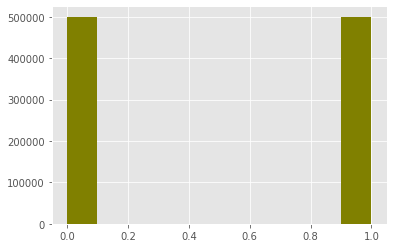

In [ ]:
##Look at distribution of the target varible (train data)
plt.hist(train_prep.HasDetections, facecolor='olive')

###### **Distribution of OS Install Type Names**
###### The histogram below shos that UUPUpgrade is the most common OS install type name, followed by IBSClean in the training data. In the test set, the the count of IBS clean is the most common followed by UUPUpgrade. Note that the graphs have different y axis scales.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


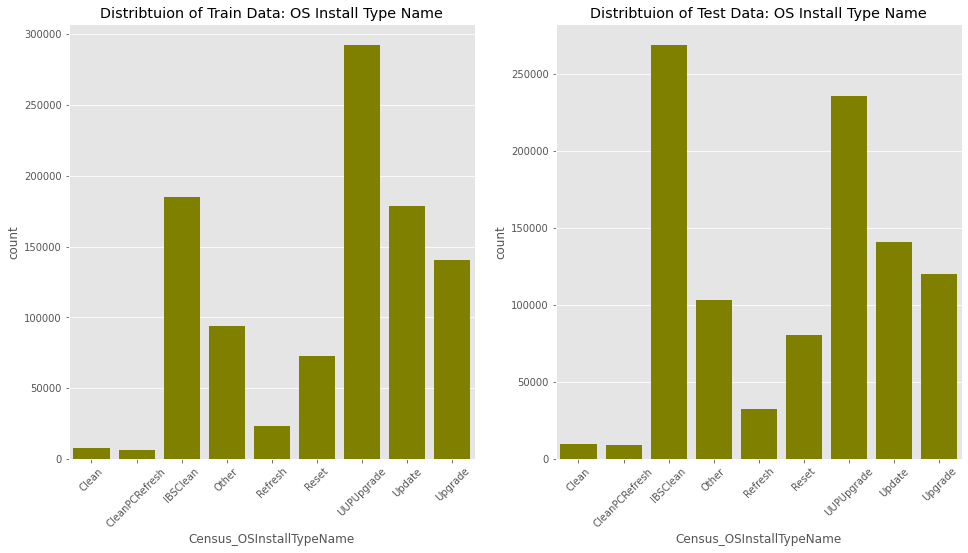

In [ ]:
plt.figure(figsize=(16, 8)) 
plt.subplot(1,2,1)
chart= sns.countplot(train_prep.Census_OSInstallTypeName, facecolor='olive', x="OS Install Type Name")
plt.title('Distribtuion of Train Data: OS Install Type Name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart= sns.countplot(test_prep.Census_OSInstallTypeName, facecolor='olive', x="OS Install Type Name")
plt.title('Distribtuion of Test Data: OS Install Type Name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.show()

###### **Distribution of 'IsProtected'**
###### This varible, binary, is is true if the machine has at least one active and up to date anti virus program. Aside from the difference in record counts for each set of the data, the distribtions for both the train and test sets show that the majority of machines have at least one up-to-date anti-virus program.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


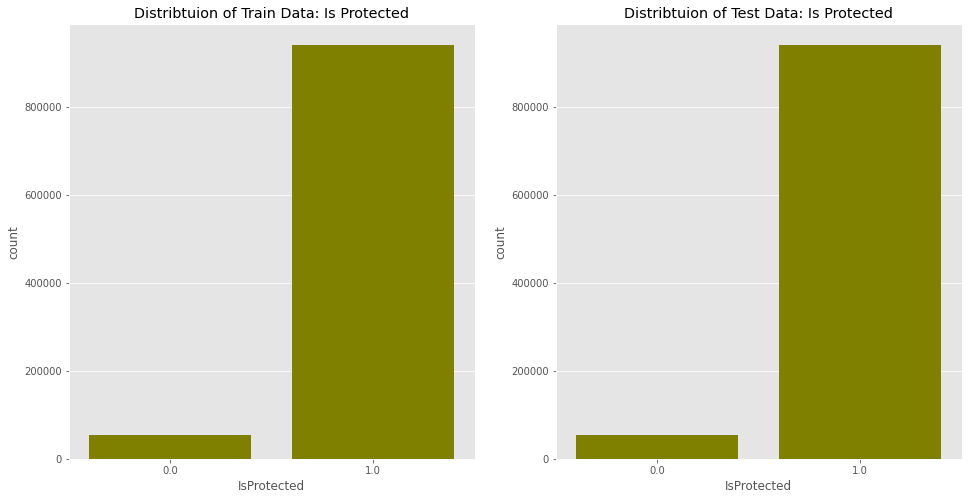

In [ ]:
plt.figure(figsize=(16, 8)) 

plt.subplot(1,2,1)
chart=sns.countplot(train_prep.IsProtected, facecolor='olive', x='Is Protected')
plt.title('Distribtuion of Train Data: Is Protected')


plt.subplot(1,2,2)
chart=sns.countplot(test_prep.IsProtected, facecolor='olive', x='Is Protected')
plt.title('Distribtuion of Test Data: Is Protected')


plt.show()

###### **Distribution of 'Firewall'**
###### This variable is a binary indicator for whether a machine has an active firewall. The histograms below reveal that the majority of users have a firewall in place for both training and test sets.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


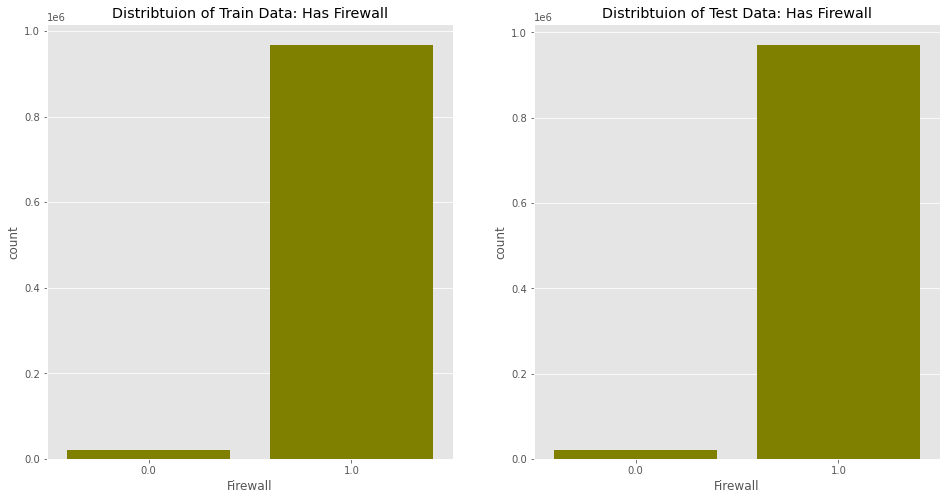

In [ ]:
plt.figure(figsize=(16, 8)) 

plt.subplot(1,2,1)
chart=sns.countplot(train_prep.Firewall, facecolor='olive', x='Has Firewall')
plt.title('Distribtuion of Train Data: Has Firewall')


plt.subplot(1,2,2)
chart=sns.countplot(test_prep.Firewall, facecolor='olive', x='HasFirewall')
plt.title('Distribtuion of Test Data: Has Firewall')


plt.show()

###### **Distribution of 'CountryIdentifier'**
###### There appears to be a diverse spread of country codes for users as shown by the histograms below. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


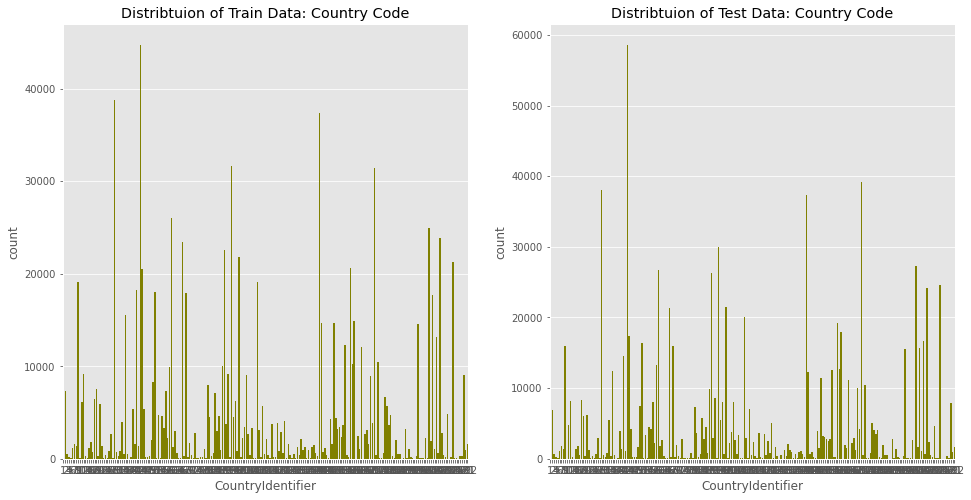

In [ ]:
#plt.hist(train_prep.CountryIdentifier, facecolor='olive', bins=30)


plt.figure(figsize=(16, 8)) 

plt.subplot(1,2,1)
chart=sns.countplot(train_prep.CountryIdentifier, facecolor='olive', x='Country Label')
plt.title('Distribtuion of Train Data: Country Code')


plt.subplot(1,2,2)
chart=sns.countplot(test_prep.CountryIdentifier, facecolor='olive', x='Country Label')
plt.title('Distribtuion of Test Data: Country Code')
plt.show()

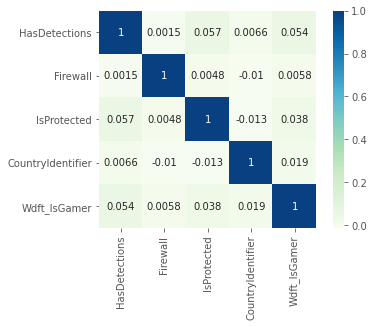

In [ ]:
## Correlation plot with selection of numeric varibles
new= df_train[['HasDetections','Firewall','IsProtected','CountryIdentifier','Wdft_IsGamer']].copy()
sns.heatmap(new.corr(), annot=True, square=True, cmap='GnBu')

### <font color='DarkOliveGreen'> Explore the **Null** Values </font>

###### We will use the missingno library to visualize missing values as well as view specific counts of each colunm's missing values

###### The bar graph below shows a visual comparison of the null values by col

###### The missingno heatmap shows the correlations of null values between varibles for the **training** dataset.

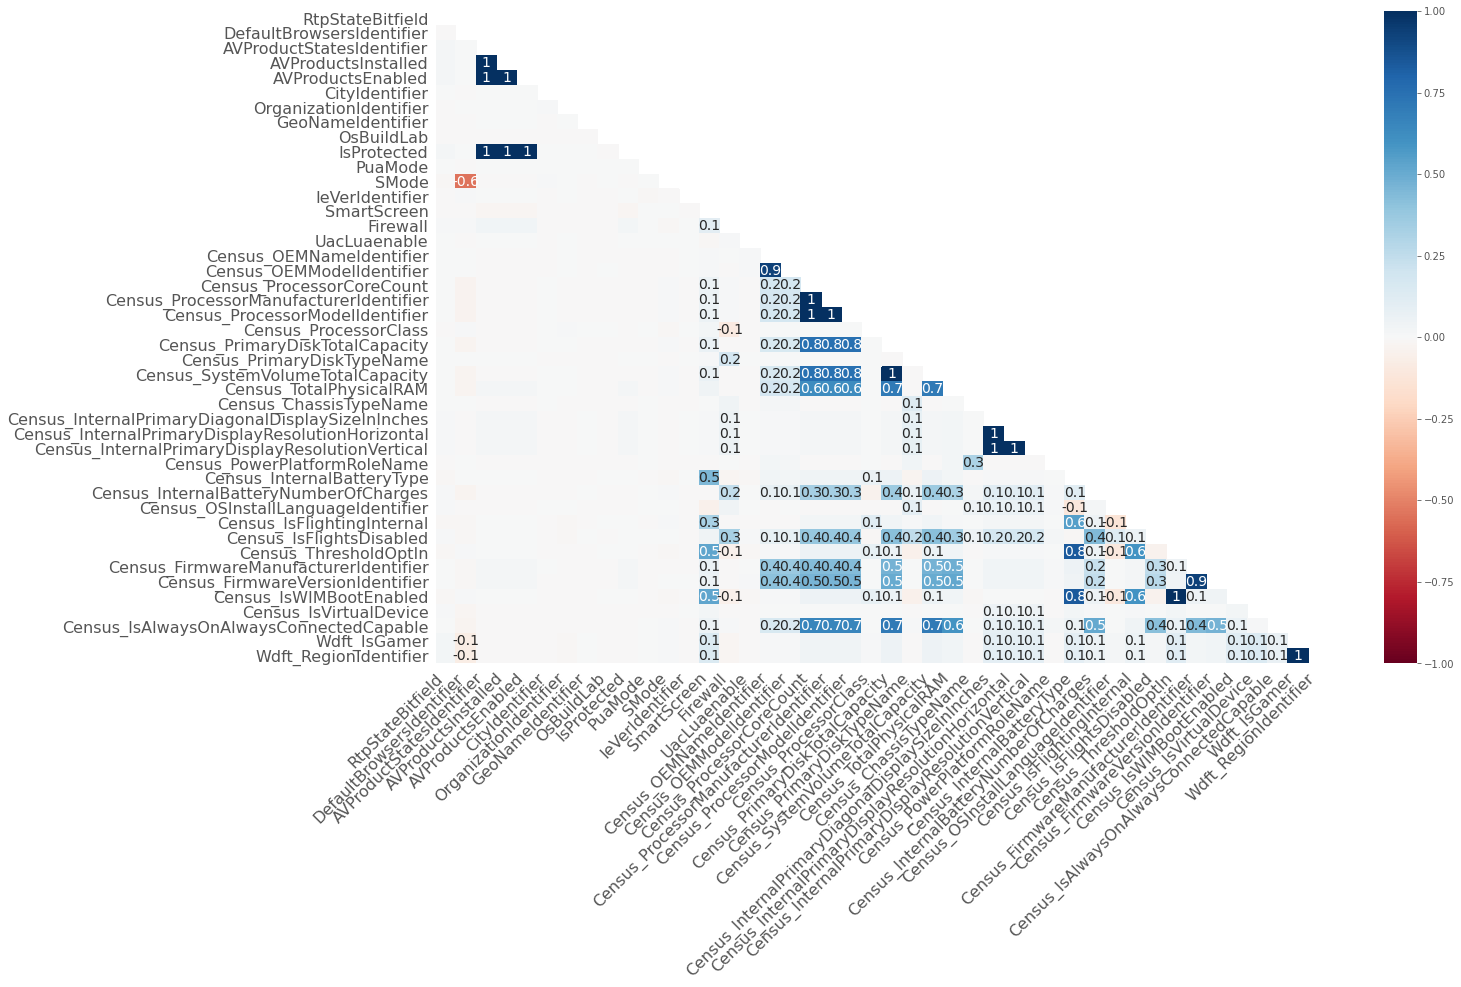

In [ ]:
import missingno as msno
msno.heatmap(train_prep)

###### The missingno heatmap shows the correlations of null values between varibles for the **test** dataset.

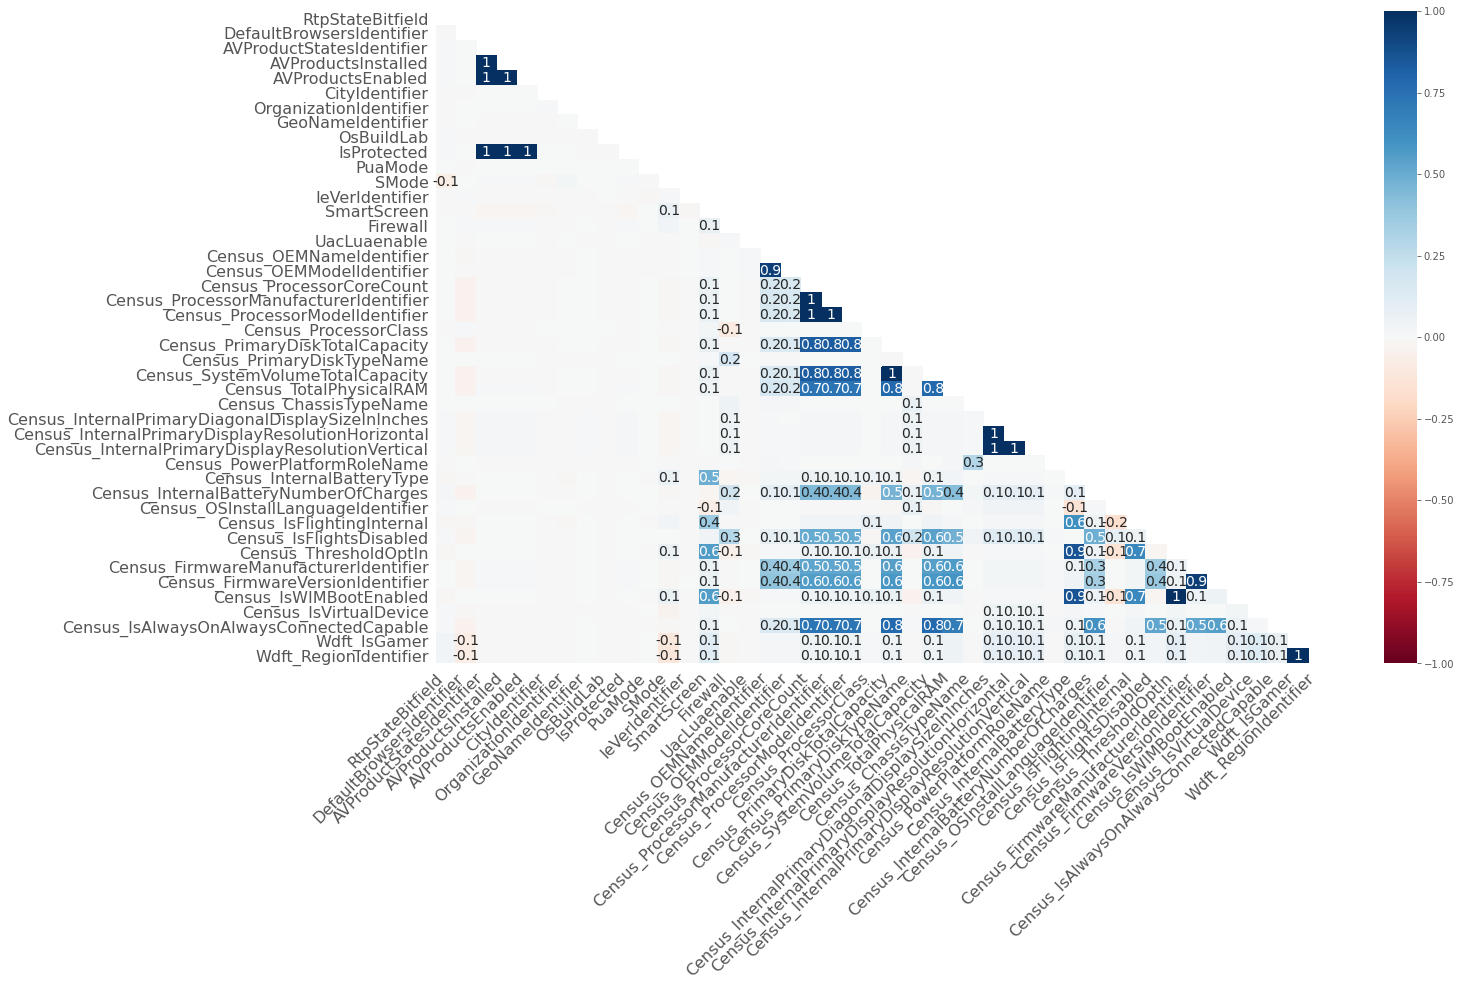

In [ ]:
msno.heatmap(test_prep)

##### Looking at the null value heat maps for the train and test datasets, it is apparent that both follow a simmilar pattern of correlations for missing data. 

In [ ]:
train_prep.isnull().sum().sort_values(ascending=False).head(15)

PuaMode                                  999738
Census_ProcessorClass                    995875
DefaultBrowsersIdentifier                951697
Census_IsFlightingInternal               830157
Census_InternalBatteryType               709830
Census_ThresholdOptIn                    634570
Census_IsWIMBootEnabled                  633713
SmartScreen                              355777
OrganizationIdentifier                   308936
SMode                                     59902
CityIdentifier                            36513
Wdft_IsGamer                              34093
Wdft_RegionIdentifier                     34093
Census_InternalBatteryNumberOfCharges     30076
Census_FirmwareManufacturerIdentifier     20453
dtype: int64

In [ ]:
test_prep.isnull().sum().sort_values(ascending=False).head(15)

PuaMode                                  999739
Census_ProcessorClass                    997733
DefaultBrowsersIdentifier                960906
Census_IsFlightingInternal               850303
Census_InternalBatteryType               761686
SMode                                    742151
Census_ThresholdOptIn                    704733
Census_IsWIMBootEnabled                  703892
SmartScreen                              445703
OrganizationIdentifier                   315631
Wdft_IsGamer                              38198
Wdft_RegionIdentifier                     38198
Census_InternalBatteryNumberOfCharges     30415
Census_FirmwareManufacturerIdentifier     25151
CityIdentifier                            24593
dtype: int64

In [ ]:
train_prep.nunique().sort_values(ascending=False).head(15)

MachineIdentifier                                    1000000
Census_SystemVolumeTotalCapacity                      212928
Census_OEMModelIdentifier                              59913
CityIdentifier                                         50872
Census_FirmwareVersionIdentifier                       29161
Census_InternalBatteryNumberOfCharges                   8805
AVProductStatesIdentifier                               8192
AvSigVersion                                            7353
Census_ProcessorModelIdentifier                         2513
Census_OEMNameIdentifier                                2003
Census_PrimaryDiskTotalCapacity                         1633
Census_TotalPhysicalRAM                                  882
DefaultBrowsersIdentifier                                784
Census_InternalPrimaryDisplayResolutionHorizontal        772
Census_InternalPrimaryDisplayResolutionVertical          748
dtype: int64

In [ ]:
test_prep.nunique().sort_values(ascending=False).head(10)

MachineIdentifier                        1000000
Census_SystemVolumeTotalCapacity          207874
Census_OEMModelIdentifier                  59790
CityIdentifier                             51220
Census_FirmwareVersionIdentifier           29569
Census_InternalBatteryNumberOfCharges       8321
AvSigVersion                                7786
AVProductStatesIdentifier                   7078
Census_ProcessorModelIdentifier             2536
Census_OEMNameIdentifier                    1981
dtype: int64

---
# <font color='DarkOliveGreen'> **Data Cleansing** </font>
---
###### The data cleansing process follows the folowing steps: 
- Removing colunms with nearly 1/2 or more of the data having a unique value
- Removing colunms with over 5,000 missing records
- Removing colunms with only one unique variable
- Removing rows with missing values

### <font color='DarkOliveGreen'> Removing Col With Many **Unique** Values </font>

In [ ]:
# Printing count of unique values in each column of the train set
print(train_prep.apply(lambda col: len(col.unique())))

MachineIdentifier                                    1000000
ProductName                                                6
EngineVersion                                             60
AppVersion                                                95
AvSigVersion                                            7353
IsBeta                                                     2
RtpStateBitfield                                           7
IsSxsPassiveMode                                           2
DefaultBrowsersIdentifier                                785
AVProductStatesIdentifier                               8193
AVProductsInstalled                                        6
AVProductsEnabled                                          7
HasTpm                                                     2
CountryIdentifier                                        222
CityIdentifier                                         50873
OrganizationIdentifier                                    47
GeoNameIdentifier       

In [ ]:
##Remove identifer number colunms that have nearly as many unique values as records in the data frame

train_prep=train_prep.drop(columns=['MachineIdentifier'], axis=1)
test_prep=test_prep.drop(columns=['MachineIdentifier'], axis=1)
train_prep=train_prep.drop(columns=['Census_OEMModelIdentifier'], axis=1)
test_prep=test_prep.drop(columns=['Census_OEMModelIdentifier'], axis=1)
train_prep=train_prep.drop(columns=['Census_FirmwareVersionIdentifier'], axis=1)
test_prep=test_prep.drop(columns=['Census_FirmwareVersionIdentifier'], axis=1)
train_prep=train_prep.drop(columns=['Census_SystemVolumeTotalCapacity'], axis=1)
test_prep=test_prep.drop(columns=['Census_SystemVolumeTotalCapacity'], axis=1)
train_prep=train_prep.drop(columns=['CityIdentifier'], axis=1) ##Note, leading null count
test_prep=test_prep.drop(columns=['CityIdentifier'], axis=1)

print(f'train data after removing cols with no variance {train_prep.shape}')
print(f'train data after removing cols with no variance {test_prep.shape}')

train data after removing cols with no variance (1000000, 78)
train data after removing cols with no variance (1000000, 77)


### <font color='DarkOliveGreen'> Removing **Redundant** Columns </font>
###### Colunms with only one unique value are redunant and thus can be removed.

In [ ]:
##Remove col with unqiue value counts of one

for col in train_prep.columns:
  if train_prep[col].nunique() == 1:
    train_prep = train_prep.drop(col, axis=1)
print(f'train data after removing cols with no variance {train_prep.shape}')

for col in test_prep.columns:
  if test_prep[col].nunique() == 1:
    test_prep = test_prep.drop(col, axis=1)
print(f'train data after removing cols with no variance {test_prep.shape}')


train data after removing cols with no variance (1000000, 76)
train data after removing cols with no variance (1000000, 75)


### <font color='DarkOliveGreen'> Removing Col With 5,000 or Greater Counts of  **Null** Values </font>

###### As seen above, some of the colunms are missing noteworthy proportions of the data. Thus, colunms with 5,000 or more of null records will be removed. 

In [ ]:
# Removing columns with a lot of missing values

for col in train_prep.columns:
  if train_prep[col].isnull().sum() >= 5000:
    train_prep = train_prep.drop(col, axis=1)
print(f'train data after removing cols with much nulls {train_prep.shape}')

train data after removing cols with much nulls (1000000, 53)


In [ ]:
# removing columns with a lot of missing values
for col in test_prep.columns:
  if test_prep[col].isnull().sum() >= 5000:
    test_prep = test_prep.drop(col, axis=1)
print(f'test data after removing cols with much nulls {test_prep.shape}')

test data after removing cols with much nulls (1000000, 49)


### <font color='DarkOliveGreen'> Check for **Duplicate** Records </font>

In [ ]:
train_prep.duplicated().sum()

667

In [ ]:
trian_prep = train_prep.drop_duplicates()

In [ ]:
test_prep.duplicated().sum()

6004

In [ ]:
test_prep = test_prep.drop_duplicates()

### <font color='DarkOliveGreen'> Removing Rows With **Null** Values </font>

In [ ]:
# both data sets are large enough to omit rows missing values 
train_prep = train_prep.dropna(axis=0)
test_prep = test_prep.dropna(axis=0)
print(f'train data: {train_prep.shape}')
print(f'test data: {test_prep.shape}')

train data: (983375, 53)
test data: (982721, 49)


### <font color='DarkOliveGreen'> Equalize the number of Col for Train and Test Sets </font> 
##### To ensure that the model runs correctly, both the train and test set need to have the same number of col. Recall that the training set has the target variable col "HasDetections" and the test data does not. 

In [ ]:
## equalizing the number of columns in train and test sets, test had 50 cols and train had 54  
for col in train_prep.columns: 
    if col not in list(test_prep.columns) and col != 'HasDetections':
      train_prep = train_prep.drop(col, axis=1)
print(train_prep.shape)

(983375, 50)


In [ ]:
# printing count of unique values in each column of the train set
#print(train_prep.apply(lambda col: len(col.unique())))

In [ ]:
# Equalizing the number of columns in train and test sets, test had 50 cols and train had 54  
for col in test_prep.columns:
  if col not in list(train_prep.columns) and col != 'HasDetections':
    test_prep = test_prep.drop(col, axis=1)
print(test_prep.shape)

(982721, 49)


In [ ]:
print(test_prep.shape)

(982721, 49)


---
# <font color='DarkOliveGreen'> Feature Engineering </font>

##### Copy over the train and test datasets from the data cleansing above

In [ ]:
# copy cleaned data from data preparation section
train_engrd = train_prep.copy(deep=True)
test_engrd = test_prep.copy(deep=True)

##### Convert all interger types 8, 16, and 32 into type object for both the train and test sets

In [ ]:
# all integer colums in fact categorical identifiers which should be categories not numeric
num_cols_train = train_engrd.select_dtypes(include=['int8', 'int16','int32'])
for col in train_engrd.columns:
  if col in list(num_cols_train.columns):
    train_engrd[col] = train_engrd[col].astype('object')
print(f'train data: {train_engrd.dtypes}')
# for test data
num_cols_test = test_engrd.select_dtypes(include=['int8', 'int16','int32'])
for col in test_engrd.columns:
  if col in list(num_cols_test.columns):
    test_engrd[col] = test_engrd[col].astype('object')
print(f'test data : {test_engrd.dtypes}')

train data: ProductName                         category
EngineVersion                       category
AppVersion                          category
AvSigVersion                        category
IsBeta                                object
RtpStateBitfield                     float16
IsSxsPassiveMode                      object
AVProductStatesIdentifier            float32
AVProductsInstalled                  float16
AVProductsEnabled                    float16
HasTpm                                object
CountryIdentifier                     object
GeoNameIdentifier                    float16
LocaleEnglishNameIdentifier           object
Platform                            category
Processor                           category
OsVer                               category
OsBuild                               object
OsSuite                               object
OsPlatformSubRelease                category
OsBuildLab                          category
SkuEdition                          categor

In [ ]:
# Test for skewness in the target variable, data is almost perfectly balanced
train_engrd['HasDetections'].value_counts()

1    491957
0    491418
Name: HasDetections, dtype: int64

---
# <font color='DarkOliveGreen'>**Modeling** </font>

---

##### We will build a **Random Forest Model** and **Logistic Regression Model**


---
### <font color='DarkOliveGreen'> **Random Forest** </font>
---
###### Below outlines the procedure of building the random forest model and getting model metrics with a confusion matrix

###### Begin by importing libraries

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


###### Because the data was too big to run the model, a reduced size will be used

In [ ]:
# take sample of the data for Randomforest model 
RF_df = mod_train.sample(frac=0.10, replace=True, random_state=0)
RF_df.shape

(491688, 45)

In [ ]:
# change the target varaible to integer
RF_df['HasDetections'] = RF_df['HasDetections'].astype('int')

###### Manually create the train and test sets, because the data was loaded in two sets

In [ ]:
##Copy over train and test sets into new varibles for the model (manual train/test split)
X = RF_df.drop(["HasDetections"], axis=1)
y = RF_df["HasDetections"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

###### Separate the numeric and cat variable

In [ ]:
# Separate numerical columns from categorical for preprocessing
num_cols = X_train.select_dtypes(include=['float16', 'float32', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['category','object']).columns

In [ ]:
# calling all independent varaibles for preprocessing
cat_cols = mod_train.select_dtypes(include=['object']).columns

Transformers for numeric and cat variables

In [ ]:
#Column transformer
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
##Will put numeric col to one standard scale
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
##Dummy coding cat vars

In [ ]:
#Preprpcessing columns
##Call to transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

###### Build the pipeline

In [ ]:
# Building pipeline
mod = RandomForestClassifier(random_state= 42)
clf_RF = Pipeline([('preprocessor', preprocessor),('mod',mod)])

In [ ]:
clf.RF.fit()

In [ ]:

clf_RF.score(X_test, y_test)

0.6288387227984543

In [ ]:
# the code to extract feature importance
result = permutation_importance(clf_RF, X_train, y_train, n_repeats=10,
                                random_state=42)
sorted_idx = result.importances_mean.argsort()

In [ ]:
# plot the feature importance
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, 
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Feature Importance")
fig.set_size_inches(12,6)
fig.set_facecolor('lightgrey')
fig.set_edgecolor('red')
fig.tight_layout()
plt.show()

In [ ]:
# predicting the x_test 
predictions = clf_RF.predict(X_test)

In [ ]:
# building confusion matrix
conf_mtrx = confusion_matrix(y_test, predictions)
conf_mtrx

array([[6299, 3486],
       [3814, 6069]])

##### Visualize the model metrics with a confusion matrix

Text(33.0, 0.5, 'actual')

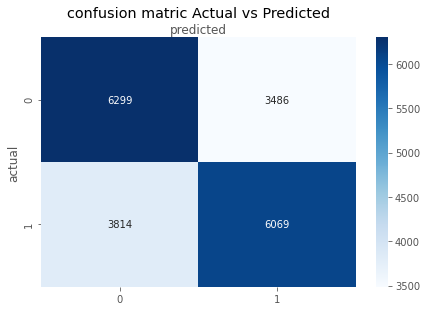

In [ ]:
# visualizing confusion matrix resluts
cat_names = [0,1]
fig, ax = plt.subplots()
tickmarks = np.arange(len(cat_names))
plt.xticks(tickmarks, cat_names)
plt.yticks(tickmarks, cat_names)
sns.heatmap(pd.DataFrame(conf_mtrx), annot=True, cmap= 'Blues', fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matric Actual vs Predicted')
plt.xlabel('predicted')
plt.ylabel('actual')

---
### <font color='DarkOliveGreen'> **Logisic Regression Model** </font>
---
###### Below outlines the procedure of building the logisic regression model and getting model metrics with a confusion matrix

In [ ]:
# import libraries
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 

In [ ]:
# copy data from Feature engineering section 
mod_train = train_engrd.copy(deep =True)
mod_test = test_engrd.copy(deep =True)

In [ ]:
mod_train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,1,29,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,1.0,Desktop,Windows.Desktop,HDD,0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,119,UNKNOWN,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,1,93,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,1.0,Notebook,Windows.Desktop,HDD,0,Notebook,Mobile,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,31,UNKNOWN,0,OFFLINE,Retail,NOT_SET,0,0.0,0,0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,1,86,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,1.0,Desktop,Windows.Desktop,SSD,0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,Retail,0,0.0,0,0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,1,88,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,1.0,Desktop,Windows.Desktop,UNKNOWN,0,MiniTower,Desktop,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,Retail,0,0.0,0,0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,1.0,1,18,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,1.0,Notebook,Windows.Desktop,HDD,0,Portable,Mobile,10.0.17134.191,amd64,rs4_release,17134,191,Core,CORE,Update,31,FullAuto,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,1


###### Remove additional col with large numbers of unique values prior to model building

In [ ]:
# dropping columns with huge nunmber of unique values
mod_train = mod_train.drop(['AVProductStatesIdentifier','AvSigVersion', 
                            'Census_PowerPlatformRoleName', 'Census_MDC2FormFactor','AppVersion'], axis = 1)
mod_test = mod_test.drop(['AVProductStatesIdentifier','AvSigVersion', 
                          'Census_PowerPlatformRoleName', 'Census_MDC2FormFactor', 'AppVersion'], axis = 1)

###### Convert all data (numeric and cat) into type object

In [ ]:
# change columns to object type in both datasets
for col in mod_train.columns:
  mod_train[col] = mod_train[col].astype('object')
for col in mod_test.columns:
  mod_test[col] = mod_test[col].astype('object')

###### Change the output var type to interger

In [ ]:
# change the target varaible to integer
mod_train['HasDetections'] = mod_train['HasDetections'].astype('int')

In [ ]:
# calling all independent varaibles for preprocessing
cat_cols = mod_train.select_dtypes(include=['object']).columns

In [ ]:
mod_train.head()

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,0,7,0,1,1,1,29,35,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1,0,1,Desktop,Windows.Desktop,HDD,0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,119,UNKNOWN,0,IS_GENUINE,Retail,Retail,0,0,0,0,0
1,win8defender,1.1.14600.4,4.13.17134.1,0,7,0,1,1,1,93,119,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1,0,1,Notebook,Windows.Desktop,HDD,0,Notebook,Mobile,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,31,UNKNOWN,0,OFFLINE,Retail,NOT_SET,0,0,0,0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,0,7,0,1,1,1,86,64,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1,0,1,Desktop,Windows.Desktop,SSD,0,Desktop,Desktop,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,Retail,0,0,0,0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,0,7,0,1,1,1,88,117,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1,0,1,Desktop,Windows.Desktop,UNKNOWN,0,MiniTower,Desktop,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,Retail,0,0,0,0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,0,7,0,1,1,1,18,277,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1,0,1,Notebook,Windows.Desktop,HDD,0,Portable,Mobile,10.0.17134.191,amd64,rs4_release,17134,191,Core,CORE,Update,31,FullAuto,0,IS_GENUINE,Retail,Retail,0,0,0,0,1


###### Split the data to training and testing sets

In [ ]:
# defining target varaible
X = mod_train.drop(['HasDetections'], axis=1)
y = mod_train['HasDetections']
# spliting data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Transform the variables using the one hot encoder

In [ ]:
# column transformer
#num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
#preprpcessing columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols)])

###### Build the pipeline

In [ ]:
# building pipeline
#smt = SMOTE(random_state=42, ratio='minority')
#rfe = RFE(LogisticRegression(), n_features_to_select=5 )
lr = LogisticRegression()
clf = Pipeline([('preprocessor', preprocessor), #('rfe', rfe), #('smt',smt),
                ('lr',lr)])

In [ ]:
X_train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable
950155,win8defender,1.1.15200.1,4.18.1807.18075,1.275.715.0,0,7.0,0,53447.0,1.0,1.0,1,158,277.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,1.0,Desktop,Windows.Desktop,HDD,0,Desktop,Desktop,10.0.17134.112,amd64,rs4_release,17134,112,Professional,PROFESSIONAL,IBSClean,31,UNKNOWN,0,IS_GENUINE,Retail,Retail,0,0.0,0,0
233151,win8defender,1.1.15300.6,4.18.1807.18075,1.275.1487.0,0,7.0,0,53447.0,1.0,1.0,1,66,89.0,88,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,1.0,Notebook,Windows.Desktop,UNKNOWN,0,Other,Mobile,10.0.17134.286,amd64,rs4_release,17134,286,Professional,PROFESSIONAL,IBSClean,49,UNKNOWN,0,OFFLINE,Retail,NOT_SET,0,1.0,0,0
63507,win8defender,1.1.15200.1,4.18.1807.18075,1.275.727.0,0,7.0,0,53447.0,1.0,1.0,1,41,52.0,217,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,1.0,Notebook,Windows.Desktop,HDD,0,Notebook,Mobile,10.0.17134.228,amd64,rs4_release,17134,228,CoreSingleLanguage,CORE_SINGLELANGUAGE,Reset,34,FullAuto,0,IS_GENUINE,Retail,Retail,1,0.0,0,0
240164,win8defender,1.1.15100.1,4.18.1807.18075,1.273.612.0,0,7.0,0,53447.0,1.0,1.0,1,44,57.0,218,windows10,x86,10.0.0.0,15063,768,rs2,15063.0.x86fre.rs2_release.170317-1834,Home,1.0,0,1.0,LargeTablet,Windows.Desktop,SSD,0,Desktop,Slate,10.0.15063.1206,x86,rs2_release,15063,1206,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35,Notify,0,IS_GENUINE,OEM:DM,Retail,0,0.0,1,1
947517,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,53447.0,1.0,1.0,1,107,138.0,134,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,1.0,Notebook,Windows.Desktop,SSD,0,Notebook,Mobile,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,Reset,83,UNKNOWN,0,IS_GENUINE,OEM:DM,Retail,1,0.0,0,0


###### Fit the model

In [ ]:
# fitting the mode
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                                

In [ ]:
# getting the accuracy score 
clf.score(X_test, y_test)

0.6104741324520148

In [ ]:
# predicting the x_test 
predictions = clf.predict(X_test)

##### Obtain model metrics and visualize as a confusion matrix

In [ ]:
# building confusion matrix
conf_mtrx = confusion_matrix(y_test, predictions)
conf_mtrx

array([[56016, 42338],
       [34272, 64049]])

Text(33.0, 0.5, 'actual')

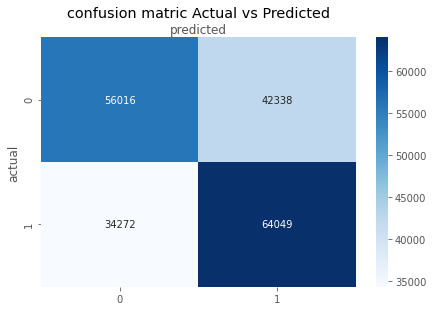

In [ ]:
# visualizing confusion matrix resluts
cat_names = [0,1]
fig, ax = plt.subplots()
tickmarks = np.arange(len(cat_names))
plt.xticks(tickmarks, cat_names)
plt.yticks(tickmarks, cat_names)
sns.heatmap(pd.DataFrame(conf_mtrx), annot=True, cmap= 'Blues', fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matric Actual vs Predicted')
plt.xlabel('predicted')
plt.ylabel('actual')

In [ ]:
# getting the score on the train set 
clf.score(X_train, y_train)

0.6125346383627812

In [ ]:
# prediction the test set
test_set_pred = pd.DataFrame(clf.predict(mod_test), index=mod_test.index)
# joining the predictions with the test dataset
test_set_pred = test_set_pred.merge(mod_test, on = mod_test.index)
# renaming predictions column 
test_set_pred = test_set_pred.rename(columns={0: 'predictions'})
#droping duplicated index column
test_set_pred = test_set_pred.drop('key_0', axis= 1
test_set_pred.head()

,predictions,ProductName,EngineVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,UacLuaenable,Census_DeviceFamily,Census_PrimaryDiskTypeName,Census_HasOpticalDiskDrive,Census_ChassisTypeName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable
0,0,win8defender,1.1.15400.5,0,7.0,0,1.0,1.0,1,43,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,1.0,Windows.Desktop,SSD,0,Notebook,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,Retail,1,0.0,0,0
1,1,win8defender,1.1.15400.4,0,7.0,0,1.0,1.0,1,68,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,1.0,Windows.Desktop,HDD,0,Notebook,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,Retail,1,0.0,0,0
2,0,win8defender,1.1.15300.6,0,7.0,0,2.0,1.0,1,201,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,1.0,Windows.Desktop,SSD,0,Notebook,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,148,UNKNOWN,0,IS_GENUINE,OEM:DM,Retail,1,0.0,0,0
3,0,win8defender,1.1.15400.5,0,7.0,0,2.0,1.0,1,29,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,1.0,Windows.Desktop,HDD,0,Notebook,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,119,Notify,0,IS_GENUINE,OEM:DM,Retail,1,0.0,0,0
4,1,win8defender,1.1.15400.4,0,7.0,0,1.0,1.0,1,171,211.0,182,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,1.0,Windows.Desktop,HDD,1,Notebook,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,125,UNKNOWN,0,IS_GENUINE,Retail,Retail,1,0.0,0,0


In [ ]:
# calculating how many prediction for malware detections and how many are not 
test_set_pred['predictions'].value_counts()

0    570139
1    418563
Name: predictions, dtype: int64